# Отчет по лабораторной работе №2 "Граф интернета"

1. Реализовать алгоритм построения случайного веб-графа в модели Боллобаша–Риордана (различные n=4000+,
m=10..16). Определить параметры графов в этой модели.

## Код

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import choice
from operator import itemgetter

Выполним первую фазу алгоритма.

In [6]:
def phase1(n):      
    G = nx.MultiDiGraph()
    for i in range(1, n + 1):
        _add_edge(G, i)
    return G

def _add_edge(G, n, a=0.3):
    weights = [(w + a - 1) / ((a + 1) * n - 1) for w in list(G.degree().values())]
    G.add_node(n)
    weights.append(a / ((a + 1) * n - 1))
#     print(G.nodes())
#     print(weights)
#     print(sum(weights))
    G.add_edge(n, choice(G.nodes(), p=weights))

Выполним вторую фазу алгоритма.

In [7]:
def phase2(G1, n, m):
    g_edges = G1.edges()
    for e in g_edges:
        G1.remove_edge(*e)
        G1.add_edge(int(np.ceil(e[0] / m)), int(np.ceil(e[1] / m)) )
    to_remove = G1.nodes()[n:]
    G1.remove_nodes_from(to_remove)
    return G1

# def phase2_OLD(G1, m):
#     G2 = nx.MultiDiGraph()
#     for edge1 in G1.edges():
#         G2.add_edge(int(np.ceil(edge1[0] / m)), int(np.ceil(edge1[1] / m)) )
#     return G2

Метод для получения итогового графа.

In [8]:
def bollobash_riordan_model(n, m):
    G1 = phase1(m * n)
    G2 = phase2(G1, n, m)
    return G2

Метод для отрисовки графа (было полезно при отладки на графах малого размера, однако, петли отобразить не удалось, хотя они там есть :) ).

In [9]:
def draw_graph(G):
    d = nx.degree(G)
    pos = nx.spring_layout(G)
    nx.draw(G, pos, nodelist=d.keys(), node_size = [v * 50 for v in d.values()])
    plt.show()
    

Метода для высчитывания характеристик графа.

In [10]:
def graph_diameter(G):
    max_global = 0
    for n in G.nodes_iter():
        length=nx.single_source_shortest_path_length(G,n)
        n_max = max(list(length.values()))
        if n_max > max_global:
            max_global = n_max
    return max_global


def average_distance_by_components(G):
    if nx.is_directed(G):
        return [nx.average_shortest_path_length(sub_g) for sub_g in nx.weakly_connected_component_subgraphs(G)]
    else:
        return [nx.average_shortest_path_length(sub_g) for sub_g in nx.connected_component_subgraphs(G)]
    
    
def components_num(G):
     if nx.is_directed(G):
        return nx.number_weakly_connected_components(G)
     else:
        return nx.number_connected_components(G)

Методы для конструирования и отрисовки гистограммы #(n, d) (показываются только степени с ненулевым количеством вершин, ввиду большого количество нулевых).

In [14]:
def generate_plot(data):
    ax = plt.figure().add_subplot(111)
    sort_keys = sorted(list(data.keys()))
    x_val = [x for x in range(1, len(sort_keys) + 1)]
    y_val = [data[k] for k in sort_keys]
    ax.plot(x_val, y_val)
    plt.tick_params(axis='both', labelsize=10)
    plt.xticks(x_val, sort_keys, rotation='vertical')
    plt.xlabel('degree')
    plt.ylabel('count')
    plt.xlim(0, max(x_val) + 1)
    plt.ylim(0, max(y_val) + 1)
    plt.grid(True)
    plt.show()

def plot_degree_histogram(G):
    deg_hist = nx.degree_histogram(G)
    g_degrees = {i: deg_hist[i] for i in np.nonzero(deg_hist)[0]}
    generate_plot(g_degrees)
    

Вывод всех параметров.

In [17]:
def calculate_parameters(G, n, m):
    print("-" * 30)
    print("n = ", n)
    print("m = ", m)
    print("Diameter: ", graph_diameter(G))
    print("Components number: ", components_num(G))
    av_dists = average_distance_by_components(G)
    print("Average distance by components: ", av_dists)
    print("Average distance overall: ", np.mean(av_dists))
    plot_degree_histogram(G)
    print("-" * 30)

## Эксперименты

### 1. n = 6, m = 2

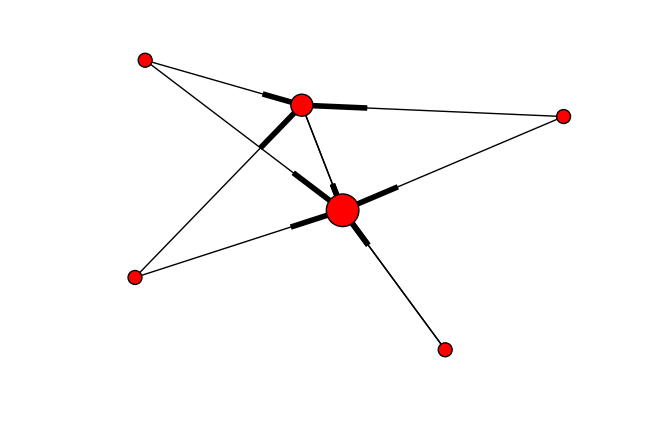

------------------------------
n =  6
m =  2
Diameter:  1
Components number:  1
Average distance by components:  [0.26666666666666666]
Average distance overall:  0.266666666667


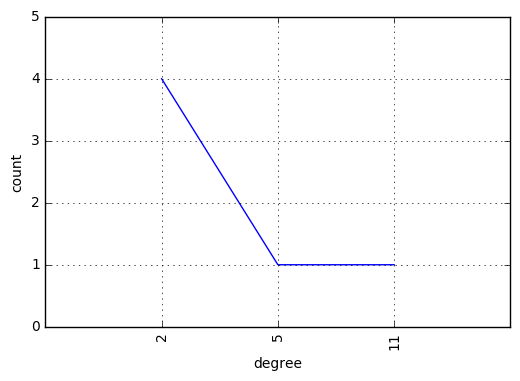

------------------------------


In [18]:
n, m = 6, 2
G1 = bollobash_riordan_model(n, m)
draw_graph(G1)
calculate_parameters(G1, n, m)

### 2. n = 100, m = 4

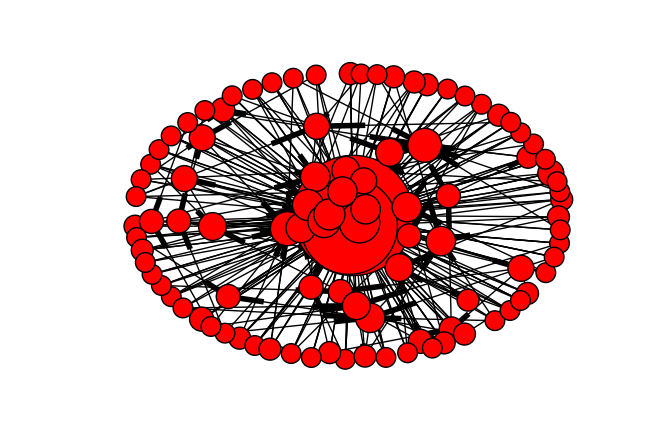

------------------------------
n =  100
m =  4
Diameter:  8
Components number:  1
Average distance by components:  [0.20383838383838385]
Average distance overall:  0.203838383838


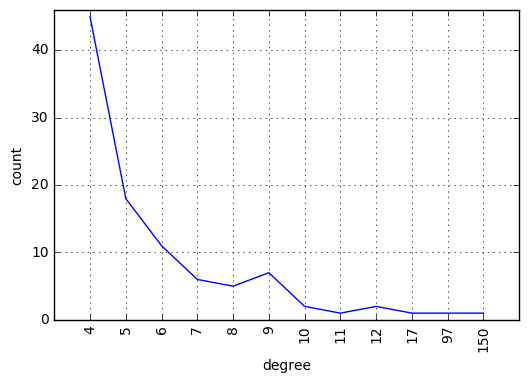

------------------------------


In [20]:
n, m = 100, 4
G1 = bollobash_riordan_model(n, m)
draw_graph(G1)
calculate_parameters(G1, n, m)

### 3. n = 1000, m = 10

In [ ]:
n, m = 1000, 10
G1 = bollobash_riordan_model(n, m)
calculate_parameters(G1, n, m)